In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#homelessness dataframe creation
file_to_load = "../Homelessness_Count_USA.csv"
homelessness_data = pd.read_csv(file_to_load)
homelessness_df = pd.DataFrame(homelessness_data)

#list of counties for looking through homeless data with
counties = ["Los Angeles City & County CoC", 
            "San Francisco CoC", 
            "Las Vegas/Clark County CoC",
            "Metropolitan Denver Homeless Initiative", 
            "Kansas City/Independence/Lee's Summit/Jackson County CoC", 
            "Cook County CoC", 
            "Fulton County Continuum of Care", 
            "Miami/Dade County CoC", 
            "Philadelphia CoC", 
            "Phoenix/Mesa/Maricopa County Regional CoC",
            "Boston CoC", 
            "Detroit CoC", 
            "Indianapolis CoC", 
            "Seattle/King County CoC", 
            "Dallas City & County/Irving CoC", 
            "Nashville/Davidson County CoC", 
            "Albuquerque CoC", 
            "Charlotte/Mecklenberg CoC", 
            "New York City CoC", 
            "Minneapolis/Hennepin County CoC"]

#preparing to drop indexes that are not total homeless
index_names = homelessness_df[homelessness_df['Attribute Name'] != 'Total Homeless'].index

#new df with just total homeless values
clean_homeless_data = homelessness_df.drop(index_names)
clean_homeless_data

#drawing out only 2014 values
remove_2015 = clean_homeless_data[clean_homeless_data['Year - Text'] != 2014].index
homeless_2014 = clean_homeless_data.drop(remove_2015)
county_clean_homeless_data_2014_df = homeless_2014.set_index('CoC Name')

#drawing out only 2015 values
remove_2014 = clean_homeless_data[clean_homeless_data['Year - Text'] != 2015].index
homeless_2015 = clean_homeless_data.drop(remove_2014)
county_clean_homeless_data_2015_df = homeless_2015.set_index('CoC Name')

#print test to make sure the specific year will print
print(county_clean_homeless_data_2014_df.loc['San Francisco CoC','Value'])
print(county_clean_homeless_data_2015_df.loc['San Francisco CoC','Value'])

6408
6775


In [3]:
#want to take specific data and append it to list
list_2014_total_homeless = []
list_2015_total_homeless = []

for county_name in counties:
    homeless_value_2014 = county_clean_homeless_data_2014_df.loc[county_name, 'Value']
    list_2014_total_homeless.append(homeless_value_2014)
    homeless_value_2015 = homeless_value_2015 = county_clean_homeless_data_2015_df.loc[county_name, 'Value']
    list_2015_total_homeless.append(homeless_value_2015)  
    
print(list_2014_total_homeless)
print(list_2015_total_homeless)

[34393, 6408, 7443, 6621, 1931, 1182, 477, 4156, 5738, 5918, 5987, 2755, 1890, 8949, 3514, 2234, 1254, 2014, 67810, 3731]
[41174, 6775, 7509, 5335, 1446, 895, 473, 4152, 5998, 5631, 6492, 2597, 1666, 10122, 3141, 2154, 1287, 2001, 75323, 3215]


In [4]:
#created city list from courtney's list in case we want to merge information of weather and so we can merge on same 'on'
matching_citylist = ['Los_Angeles_County', 
                     'San_Francisco_County', 
                     'Clark_County', 
                     'Denver_County', 
                     'Jackson_County', 
                     'Cook_County', 
                     'Fulton_County', 
                     'Miami_Dade_County', 
                     'Philadelphia_County', 
                     'Maricopa_County', 
                     'Suffolk_County', 
                     'Wayne_County', 
                     'Marion_County', 
                     'King_County', 
                     'Dallas_County',
                     'Davidson_County', 
                     'Bernalillo_County', 
                     'Mecklenburg_County', 
                     'New_York_County', 
                     'Hennepin_County']

#making database from each value and index value
homelessness_2014_df = pd.DataFrame(list_2014_total_homeless, index = matching_citylist)
homelessness_2015_df = pd.DataFrame(list_2015_total_homeless, index = matching_citylist)

#giving name to indexes
homelessness_2014_df.index.name = 'County'
homelessness_2015_df.index.name = 'County'

#rename columns
homelessness_2014_df = homelessness_2014_df.rename(columns = {0 : 'Value_2014'})
homelessness_2015_df = homelessness_2015_df.rename(columns = {0 : 'Value_2015'})

In [5]:
homelessness_2014_df
homelessness_2014_df.to_csv('../Homeless_2014.csv', index = True, header = True)

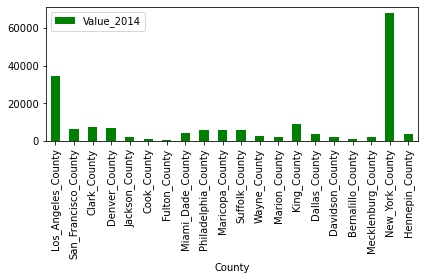

In [6]:
homeless_2014_bar_plot = homelessness_2014_df.plot(kind = 'bar', color = 'green')
homeless_2014_bar_plot
plt.tight_layout()

#png
output_data_file = '../Figures/homeless_2014_bar_plot.png'
plt.savefig(output_data_file)

In [7]:
homelessness_2015_df
homelessness_2015_df.to_csv('../Homeless_2015.csv', index = True, header = True)

<AxesSubplot:xlabel='County'>

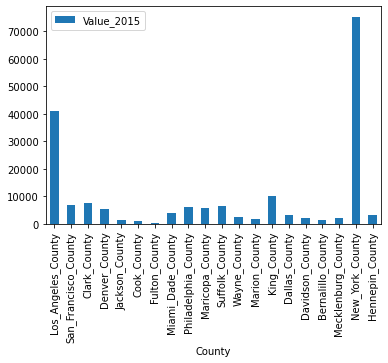

In [8]:
homeless_2015_bar_plot = homelessness_2015_df.plot(kind = 'bar')
homeless_2015_bar_plot

In [9]:
merged_homelessness = pd.merge(homelessness_2014_df, homelessness_2015_df, on = 'County')
merged_homelessness

,Value_2014,Value_2015
County,,
Los_Angeles_County,34393,41174
San_Francisco_County,6408,6775
Clark_County,7443,7509
Denver_County,6621,5335
Jackson_County,1931,1446
Cook_County,1182,895
Fulton_County,477,473
Miami_Dade_County,4156,4152
Philadelphia_County,5738,5998


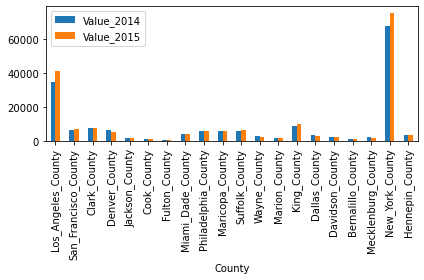

In [10]:
homeless_bar_plot = merged_homelessness.plot(kind = 'bar')
plt.tight_layout()

#png
output_data_file = '../Figures/homeless_bar_plot.png'
plt.savefig(output_data_file)

In [11]:
merged_homelessness['Difference'] = merged_homelessness['Value_2015'].sub(merged_homelessness['Value_2014'], axis = 0)
merged_homelessness

,Value_2014,Value_2015,Difference
County,,,
Los_Angeles_County,34393,41174,6781
San_Francisco_County,6408,6775,367
Clark_County,7443,7509,66
Denver_County,6621,5335,-1286
Jackson_County,1931,1446,-485
Cook_County,1182,895,-287
Fulton_County,477,473,-4
Miami_Dade_County,4156,4152,-4
Philadelphia_County,5738,5998,260


In [12]:
diff = merged_homelessness['Value_2015'] - merged_homelessness['Value_2014']
diff = diff.sort_values(ascending = False)

<AxesSubplot:xlabel='County'>

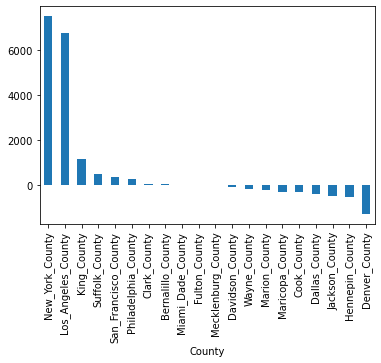

In [13]:
diff.plot(kind = 'bar')

In [14]:
#percent change
percent_change = (diff/merged_homelessness['Value_2015']) *100
percent_change = percent_change.sort_values(ascending = False)
percent_change

County
Los_Angeles_County      16.469131
King_County             11.588619
New_York_County          9.974377
Suffolk_County           7.778805
San_Francisco_County     5.416974
Philadelphia_County      4.334778
Bernalillo_County        2.564103
Clark_County             0.878945
Miami_Dade_County       -0.096339
Mecklenburg_County      -0.649675
Fulton_County           -0.845666
Davidson_County         -3.714020
Maricopa_County         -5.096786
Wayne_County            -6.083943
Dallas_County          -11.875199
Marion_County          -13.445378
Hennepin_County        -16.049767
Denver_County          -24.104967
Cook_County            -32.067039
Jackson_County         -33.540802
dtype: float64

<AxesSubplot:xlabel='County'>

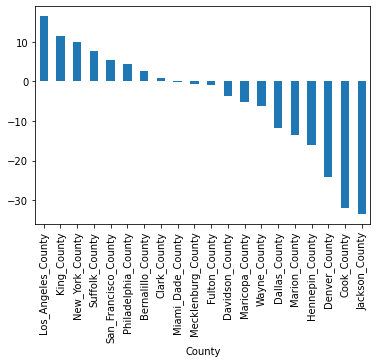

In [15]:
percent_change.plot(kind = 'bar')

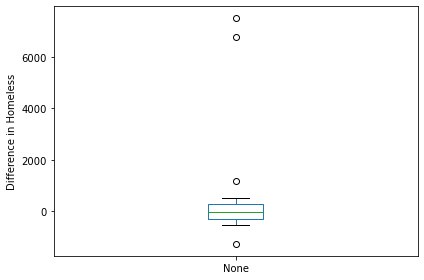

In [16]:
#figuring out if there are any outliers via visualization of boxplot
homeless_boxplot = diff.plot.box()
plt.ylabel('Difference in Homeless')
homeless_boxplot
plt.tight_layout()

#png
output_data_file = '../Figures/homeless_boxplot.png'
plt.savefig(output_data_file)

In [17]:
#pull out outliers
list_of_outliers = []
quartiles = merged_homelessness['Difference'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(lower_bound)
print(upper_bound)
    
#okay so now want to figure out what counties are outliers
for i in range(len(merged_homelessness['Difference'])):
    if (merged_homelessness['Difference'][i] <= lower_bound) or (merged_homelessness['Difference'][i] >= upper_bound):
        outlier = merged_homelessness['Difference'].index[i]
        list_of_outliers.append(outlier)
print(list_of_outliers)

-1147.625
1147.375
['Los_Angeles_County', 'Denver_County', 'King_County', 'New_York_County']


In [18]:
#now I want to pull into the csv files to create scatter plots
homeless_weather_data_2014 = pd.read_csv('../2014_Master_Summary.csv')
homeless_weather_2014_df = pd.DataFrame(homeless_weather_data_2014)

homeless_weather_data_2015 = pd.read_csv('../2015_Master_Summary.csv')
homeless_weather_2015_df = pd.DataFrame(homeless_weather_data_2015)

In [19]:
homeless_weather_2014_df

,County,Year,Homelessness_Rate(%),Total_Homeless,2014_Population_Estimate,Jan_Median_Temp,Jan_Mean_Temp,Jan_Min_Temp,Jan_Max_Temp
0,Bernalillo_County,2014,0.185600,1254,675647,29.0,30.8,8.0,64.0
1,Clark_County,2014,0.359714,7443,2069146,62.0,61.5,48.0,79.0
2,Cook_County,2014,0.022520,1182,5248704,19.0,16.6,-15.0,47.0
3,Dallas_County,2014,0.139465,3514,2519625,45.0,44.8,15.0,74.0
4,Davidson_County,2014,0.333884,2234,669094,35.0,33.2,1.0,63.0
5,Denver_County,2014,0.997194,6621,663963,30.0,29.5,-8.0,64.0
6,Fulton_County,2014,0.047869,477,996463,37.0,36.7,6.0,67.0
7,Hennepin_County,2014,0.307814,3731,1212097,9.0,9.6,-22.0,39.0
8,Jackson_County,2014,0.282441,1931,683683,28.0,26.7,-8.0,63.0
9,King_County,2014,0.429768,8949,2082288,43.0,41.8,28.0,59.0


The correlation between homeless rate and the median temperature in 2014 is -0.07


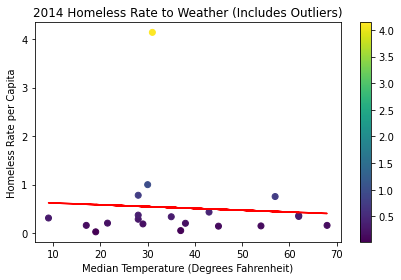

In [20]:
#creating scatterplot for data with outliers for 2014
x = homeless_weather_2014_df['Jan_Median_Temp']
y = homeless_weather_2014_df['Homelessness_Rate(%)']
t = y
homeless_2014_scatterplot = plt.scatter(x, y, c = t, cmap = 'viridis')
plt.colorbar(homeless_2014_scatterplot)
plt.xlabel('Median Temperature (Degrees Fahrenheit)')
plt.ylabel('Homeless Rate per Capita')
plt.title('2014 Homeless Rate to Weather (Includes Outliers)')

#adding regression line and correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x, regress_values,'r-')
print(f'The correlation between homeless rate and the median temperature in 2014 is {round(rvalue, 2)}')
plt.tight_layout()

#png
output_data_file = '../Figures/homeless_2014_scatterplot.png'
plt.savefig(output_data_file)

In [21]:
homeless_weather_2015_df

,County,Year,Homelessness_Rate(%),Total_Homeless,2015_Population_Estimate,Jan_Median_Temp,Jan_Mean_Temp,Jan_Min_Temp,Jan_Max_Temp
0,Bernalillo_County,2015,0.190192,1287,676685,31.0,31.4,14.0,59.0
1,Clark_County,2015,0.355069,7509,2114801,56.0,57.5,43.0,75.0
2,Cook_County,2015,0.017086,895,5238216,27.0,23.3,-8.0,43.0
3,Dallas_County,2015,0.123013,3141,2553385,41.0,43.5,17.0,79.0
4,Davidson_County,2015,0.317283,2154,678889,38.0,38.4,4.0,67.0
5,Denver_County,2015,0.781633,5335,682545,31.0,32.1,-9.0,72.0
6,Fulton_County,2015,0.046806,473,1010562,42.0,42.1,10.0,66.0
7,Hennepin_County,2015,0.262846,3215,1223149,25.0,20.2,-11.0,45.0
8,Jackson_County,2015,0.210290,1446,687623,33.0,32.3,0.0,73.0
9,King_County,2015,0.478101,10122,2117125,44.0,44.2,25.0,63.0


The correlation between homeless rate and the median temperature is -0.13


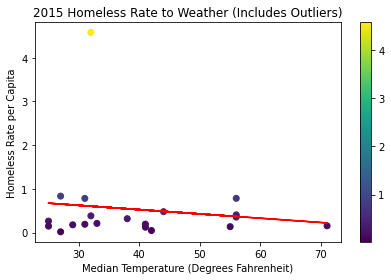

In [22]:
#creating scatterplot with outliers for 2015
x = homeless_weather_2015_df['Jan_Median_Temp']
y = homeless_weather_2015_df['Homelessness_Rate(%)']
t = y
homeless_2015_scatterplot = plt.scatter(x, y, c = t, cmap = 'viridis')
plt.colorbar(homeless_2015_scatterplot)
plt.xlabel('Median Temperature (Degrees Fahrenheit)')
plt.ylabel('Homeless Rate per Capita')
plt.title('2015 Homeless Rate to Weather (Includes Outliers)')
plt.tight_layout()

#adding regression line and correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x, regress_values,'r-')
print(f'The correlation between homeless rate and the median temperature is {round(rvalue, 2)}')

In [23]:
#set index for 2014
index_homeless_weather_2014_df = homeless_weather_2014_df.set_index('County')

#now dropping the outliers
no_outliers_homeless_weather_2014_df = index_homeless_weather_2014_df.drop(list_of_outliers)
no_outliers_homeless_weather_2014_df

,Year,Homelessness_Rate(%),Total_Homeless,2014_Population_Estimate,Jan_Median_Temp,Jan_Mean_Temp,Jan_Min_Temp,Jan_Max_Temp
County,,,,,,,,
Bernalillo_County,2014,0.185600,1254,675647,29.0,30.8,8.0,64.0
Clark_County,2014,0.359714,7443,2069146,62.0,61.5,48.0,79.0
Cook_County,2014,0.022520,1182,5248704,19.0,16.6,-15.0,47.0
Dallas_County,2014,0.139465,3514,2519625,45.0,44.8,15.0,74.0
Davidson_County,2014,0.333884,2234,669094,35.0,33.2,1.0,63.0
Fulton_County,2014,0.047869,477,996463,37.0,36.7,6.0,67.0
Hennepin_County,2014,0.307814,3731,1212097,9.0,9.6,-22.0,39.0
Jackson_County,2014,0.282441,1931,683683,28.0,26.7,-8.0,63.0
Maricopa_County,2014,0.144694,5918,4090022,54.0,53.5,32.0,77.0


The correlation between homeless rate and the median temperature in 2014 is 0.13


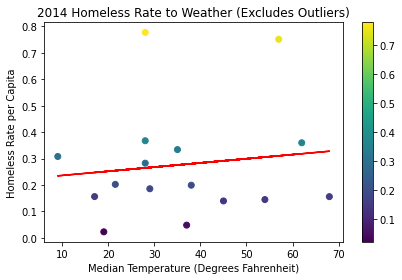

In [24]:
#creating scatterplot for data with outliers for 2014
x = no_outliers_homeless_weather_2014_df['Jan_Median_Temp']
y = no_outliers_homeless_weather_2014_df['Homelessness_Rate(%)']
t = y
no_outlier_homeless_2014_scatterplot = plt.scatter(x, y, c = t, cmap = 'viridis')
plt.colorbar(no_outlier_homeless_2014_scatterplot)
plt.xlabel('Median Temperature (Degrees Fahrenheit)')
plt.ylabel('Homeless Rate per Capita')
plt.title('2014 Homeless Rate to Weather (Excludes Outliers)')

#adding regression line and correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x, regress_values,'r-')
print(f'The correlation between homeless rate and the median temperature in 2014 is {round(rvalue, 2)}')
plt.tight_layout()

#png
output_data_file = '../Figures/no_outlier_homeless_2014_scatterplot.png'
plt.savefig(output_data_file)

In [25]:
#set index for 2015
index_homeless_weather_2015_df = homeless_weather_2015_df.set_index('County')

#now dropping outliers
no_outliers_homeless_weather_2015_df = index_homeless_weather_2015_df.drop(list_of_outliers)
no_outliers_homeless_weather_2015_df

,Year,Homelessness_Rate(%),Total_Homeless,2015_Population_Estimate,Jan_Median_Temp,Jan_Mean_Temp,Jan_Min_Temp,Jan_Max_Temp
County,,,,,,,,
Bernalillo_County,2015,0.190192,1287,676685,31.0,31.4,14.0,59.0
Clark_County,2015,0.355069,7509,2114801,56.0,57.5,43.0,75.0
Cook_County,2015,0.017086,895,5238216,27.0,23.3,-8.0,43.0
Dallas_County,2015,0.123013,3141,2553385,41.0,43.5,17.0,79.0
Davidson_County,2015,0.317283,2154,678889,38.0,38.4,4.0,67.0
Fulton_County,2015,0.046806,473,1010562,42.0,42.1,10.0,66.0
Hennepin_County,2015,0.262846,3215,1223149,25.0,20.2,-11.0,45.0
Jackson_County,2015,0.210290,1446,687623,33.0,32.3,0.0,73.0
Maricopa_County,2015,0.135102,5631,4167947,55.0,53.8,27.0,77.0


The correlation between homeless rate and the median temperature in 2015 is 0.05


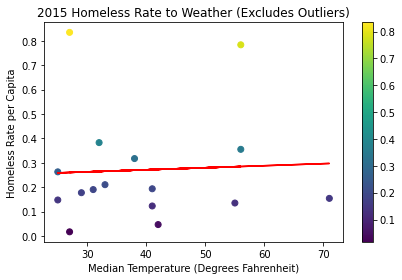

In [26]:
#creating scatterplot for data with outliers for 2014
x = no_outliers_homeless_weather_2015_df['Jan_Median_Temp']
y = no_outliers_homeless_weather_2015_df['Homelessness_Rate(%)']
t = y
no_outlier_homeless_2015_scatterplot = plt.scatter(x, y, c = t, cmap = 'viridis')
plt.colorbar(no_outlier_homeless_2015_scatterplot)
plt.xlabel('Median Temperature (Degrees Fahrenheit)')
plt.ylabel('Homeless Rate per Capita')
plt.title('2015 Homeless Rate to Weather (Excludes Outliers)')

#adding regression line and correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x, regress_values,'r-')
print(f'The correlation between homeless rate and the median temperature in 2015 is {round(rvalue, 2)}')
plt.tight_layout()